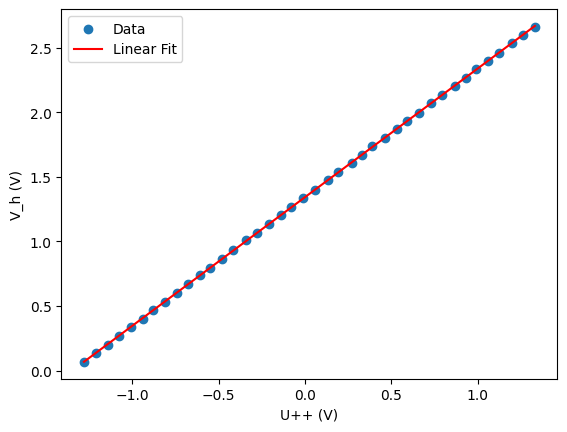

Slope: 0.9962523706227395
Intercept: 1.3436249407344314
R-value: 0.9999852193724827
P-value: 1.1294603905607473e-87
Standard Error: 0.0008787064576193215


In [73]:
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np


# Read the Excel file
df = pd.read_excel('data.xlsx', sheet_name='1-1')
df['B'] = 2.9862e-6 * df['I_m']


# BEGIN: Linear regression
slopeU, interceptU, r_valueU, p_valueU, std_errU = linregress(df['U++'], df['V_h'])
# END: Linear regression

# Plotting
plt.scatter(df['U++'], df['V_h'], label='Data')
plt.plot(df['U++'], interceptU + slopeU * df['U++'], color='red', label='Linear Fit')
plt.xlabel('U++ (V)')
plt.ylabel('V_h (V)')
plt.legend()
plt.show()


print("Slope:", slopeU)
print("Intercept:", interceptU)
print("R-value:", r_valueU)
print("P-value:", p_valueU)
print("Standard Error:", std_errU)



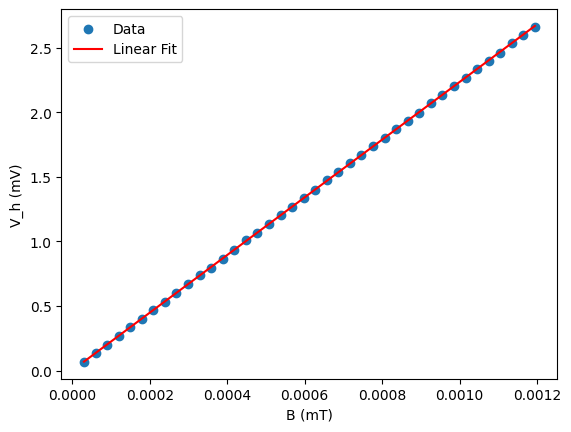

Slope: 2230.911819133492
Intercept: 0.0028317307692311555
R-value: 0.9999910476288588
P-value: 8.232875737513934e-92
Standard Error: 1.5313609176743903


In [74]:
# BEGIN: Linear regression
slopeB, intercept, r_value, p_value, std_err = linregress(df['B'],df['V_h'])
# END: Linear regression

# Plotting
plt.scatter(df['B'], df['V_h'], label='Data')
plt.plot(df['B'], intercept + slopeB * df['B'], color='red', label='Linear Fit')
plt.ylabel('V_h (mV)')
plt.xlabel('B (mT)')
plt.legend()
plt.show()
print("Slope:", slopeB)
print("Intercept:", intercept)
print("R-value:", r_value)
print("P-value:", p_value)
print("Standard Error:", std_err)

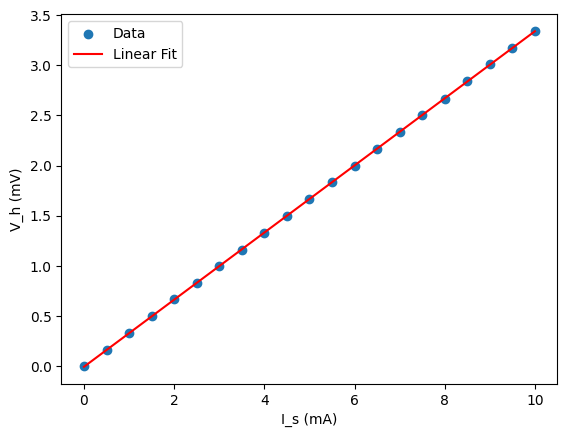

Slope: 0.3347207792207792
Intercept: -0.0069372294372291865
R-value: 0.9999906883879724
P-value: 2.1006668787514014e-46
Standard Error: 0.0003313876662076613


In [75]:
df2 = pd.read_excel('data.xlsx', sheet_name='1-2')
# BEGIN: Linear regression
slopeI, intercept, r_value, p_value, std_err = linregress(df2['I_s'], df2['V_h'])
# END: Linear regression

# Plotting
plt.scatter(df2['I_s'], df2['V_h'], label='Data')
plt.plot(df2['I_s'], intercept + slopeI * df2['I_s'], color='red', label='Linear Fit')
plt.xlabel('I_s (mA)')
plt.ylabel('V_h (mV)')
plt.legend()
plt.show()
print("Slope:", slopeI)
print("Intercept:", intercept)
print("R-value:", r_value)
print("P-value:", p_value)
print("Standard Error:", std_err)

In [76]:
K_h = np.sqrt(slopeI*(slopeB/10e-2))
print(K_h)

86.4136877163108


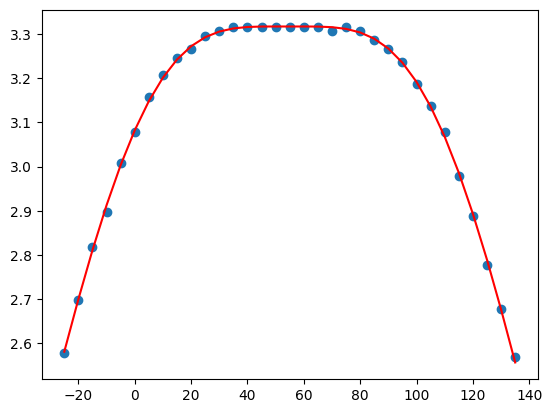

Optimized Parameters:
a: 2.323368103326105
b: 0.010007048585372097
c: -1.0474138484692044
d: -0.043401034734716536
x_zero 109.00465545839663


In [92]:
import numpy as np
from scipy.optimize import curve_fit
df3 = pd.read_excel('data.xlsx', sheet_name='2')
U=df3['U++']
V = interceptU + slopeU * U
x = df3['x']

# Define the function to fit
def func(x, a, b, c, d):
    return a / (1 + (b * x + c)**2)**(3/2) + a / (1 + (b * x + d)**2)**(3/2)

# Convert the Series to numpy arrays
x_data = np.array(x)
V_data = np.array(V)

# Perform the curve fitting
popt, pcov = curve_fit(func, x_data, V_data)

# Extract the optimized parameters
a_opt, b_opt, c_opt, d_opt = popt
plt.scatter(x, V, label='Data')
plt.plot(x, func(x, a_opt, b_opt, c_opt, d_opt), color='red', label='Fit')
plt.show()
# Print the optimized parameters
print("Optimized Parameters:")
print("a:", a_opt)
print("b:", b_opt)
print("c:", c_opt)
print("d:", d_opt)
print("x_zero",-(c_opt+d_opt)/b_opt)

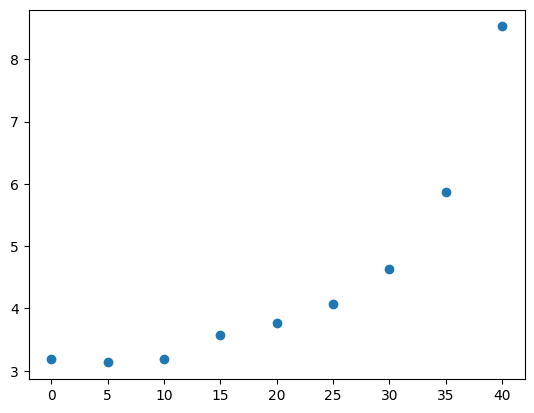

In [99]:
df4 = pd.read_excel('data.xlsx', sheet_name='3')
U2=df4['U++']
x2 = df4['x']
V2 = interceptU + slopeU * U2 - func(x2, a_opt, b_opt, c_opt, d_opt)
plt.scatter(x2, V2, label='Data')
plt.show()

In [ ]:
def B_out(x,a,b):
    return a*((b-x)**(-3))
popt, pcov = curve_fit(B_out, x2, V2)
a_opt, b_opt = popt
plt.plot(x2, B_out(a_opt,b_opt,x2), color='red', label='Fit')